Original PNG images are 1500x1500x3.  This will resize each image to 512x512x3 and put these files in
a new directory.

In [1]:
import cv2
from PIL import Image
import os 
from glob import glob
import pathlib

import numpy as np # linear algebra
import matplotlib.pylab as plt


## Resize the 1500x1500 files to 512x512

In [2]:
INPUT_PATH_PNG = '/home/ubuntu/fastai/data/roads/mass_roads_png'
OUTPUT_PATH_PNG_512 = '/home/ubuntu/fastai/data/roads/mass_roads_png_512'

### Check that the destination directories are in place.

In [3]:
def mk_dirs(path, list_of_data_sets):
    for p in list_of_data_sets:
        sat = '{}/{}/sat'.format(path, p)
        map = '{}/{}/map'.format(path, p)
        pathlib.Path(sat).mkdir(parents=True, exist_ok=True)
        pathlib.Path(map).mkdir(parents=True, exist_ok=True) 

In [6]:
mk_dirs(OUTPUT_PATH_PNG_512, ['train', 'valid', 'test'])

In [7]:
def get_ids(path, data_set):
    ''' Look in the "sat" directory and get the filenames from here. The
    same filenames appear in the "map" directory - no need to do it as well.'''
    sat_dir = '{}/{}/sat/'.format(path, data_set)
    file_dir = '{}*.png'.format(sat_dir)
    files = glob(file_dir)
    ids = [s[len(sat_dir):-4] for s in files]
    return ids

In [8]:
get_ids(INPUT_PATH_PNG, 'train')[:5]

['22978885_15', '25679230_15', '22678870_15', '17128885_15', '23428960_15']

In [9]:
get_ids(INPUT_PATH_PNG, 'valid')[:5]

['24479170_15', '17878735_15', '18178780_15', '10978735_15', '22978990_15']

### Resize the TRAINing data

In [14]:
def resize_img(fn, data_set, subdir):
    input_file = '{}/{}/{}/{}.png'.format(INPUT_PATH_PNG, data_set, subdir, fn)
    output_file = '{}/{}/{}/{}.png'.format(OUTPUT_PATH_PNG_512, data_set, subdir, fn)
    return(input_file, output_file)

def resize_img_set(data_set, fn, size):
    for subdir in ['map', 'sat']:
        input_file, output_file = resize_img(fn, data_set, subdir)
        Image.open(input_file).resize((size,size)).save(output_file)

In [17]:
train_ids = get_ids(INPUT_PATH_PNG, 'train')
for fn in train_ids:
    resize_img_set('train', fn, 512)

### Resize the VALIDation data

In [18]:
valid_ids = get_ids(INPUT_PATH_PNG, 'valid')
for fn in valid_ids:
    resize_img_set('valid', fn, 512)

### Resize TEST data

In [19]:
test_ids = get_ids(INPUT_PATH_PNG, 'test')
for fn in test_ids:
    resize_img_set('test', fn, 512)

## Display a single image

In [10]:
def get_filenames(path, data_set):
    ''' Look in the "sat" directory and get the filenames from here. The
    same filenames appear in the "map" directory - no need to do it as well.'''
    sat_dir = '{}/{}/sat/'.format(path, data_set)
    sat_file_dir = '{}*.png'.format(sat_dir)
    sat_files = glob(sat_file_dir)
    map_dir = '{}/{}/map/'.format(path, data_set)
    map_file_dir = '{}*.png'.format(map_dir)
    map_files = glob(map_file_dir)
    return (sat_files, map_files)

In [11]:
train_sat_fns, train_map_fns = get_filenames(OUTPUT_PATH_PNG_512, 'train')
train_sat_fns[:5]

['/home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat/22978885_15.png',
 '/home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat/25679230_15.png',
 '/home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat/22678870_15.png',
 '/home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat/17128885_15.png',
 '/home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat/23428960_15.png']

In [17]:
!ls /home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat | wc -l


1108


In [19]:
num_files = !ls /home/ubuntu/fastai/data/roads/mass_roads_png_512/train/sat | wc -l
nf = int(num_files[0])

In [27]:
import random

Image shape: (512, 512, 3) | image type: uint8 | mask shape: (512, 512) | mask type: uint8


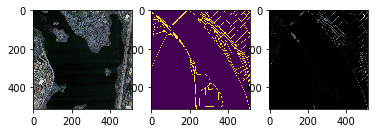

In [30]:
fm = random.choice(train_map_fns)
fs = random.choice(train_sat_fns)

mask = cv2.imread(fm,0)
img = cv2.imread(fs)

img_masked = cv2.bitwise_and(img, img, mask=mask)

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(img.shape, img.dtype, mask.shape, mask.dtype) )

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)